In [1]:
import numpy as np

#### Q1 Generate a sample with 100 data points using covidData. What is the mean for the death rate overall, for smokers, and for nonsmokers.

In [2]:
np.random.seed(11)
    # age as a uniform value [0,1]
Nsamp=100
age = np.random.uniform(low=0.0,high=1.0,size=Nsamp)
    # Smoke?
smoke = np.random.randint(low=0,high=2,size=Nsamp)
    # number of smokers and nonsmokers
nSmoke = np.sum(smoke)
nnSmoke = Nsamp - nSmoke
death = np.zeros(Nsamp,dtype=int)
    # Death prob = 0.5 if you don't smoke
death[smoke==0] = (np.random.uniform(size=nnSmoke)<0.5)
# If you do smoke, then it depends quadratically on age
death[smoke==1] = (np.random.uniform(size=(nSmoke))<3./2.*age[smoke==1]**2)
    # stack predictor variables in matrix
xPredict = np.stack((age,smoke),axis=1)

#average death rate overall
print(death.mean())
#average death rate for nonsmokers
print(death[smoke==0].mean())
#average death rate for smokers
print(death[smoke==1].mean())

0.54
0.48936170212765956
0.5849056603773585


#### Q2. First set up code to evaluate a nearest neighbor classification system. Plot the training and test set mean score (accuracy) from a 250 length monte-carlo simulation. Set the test set at 0.25 of the total sample. Do this for various neighbor sizes from 1 to 30. What looks like the optimal neighbor size for test data?

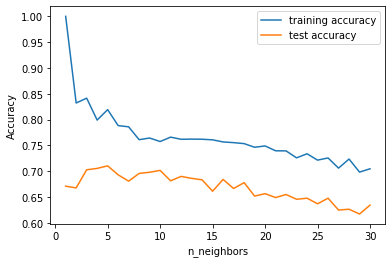

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
nmc=251
testFrac=0.25
modelObj=KNeighborsClassifier
neighbors_settings = range(1, 31)
trainScore = np.zeros([30,nmc])
testScore  = np.zeros([30,nmc])

for n_neighbors in neighbors_settings:
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(xPredict,death,test_size=testFrac)
    # build the model
        clf = modelObj(n_neighbors=n_neighbors)
        clf.fit(X_train,y_train)
        trainScore[n_neighbors-1,i] = clf.score(X_train,y_train)
        testScore[n_neighbors-1,i]  = clf.score(X_test,y_test)

trainMean=trainScore.mean(axis=1)
testMean=testScore.mean(axis=1)
plt.plot(neighbors_settings, trainMean, label="training accuracy")
plt.plot(neighbors_settings, testMean, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [4]:
tmax=np.max(testMean)
print(tmax)
result=np.argmax(testMean)+1
print("The optimal neighbor size for test data is "+str(result))

0.710597609561753
The optimal neighbor size for test data is 5


#### Q3 What is the score for the training sample with one neighbor?

In [5]:
t1=trainMean[0]
print("The score for the training sample with one neighbor is "+ str(t1))

The score for the training sample with one neighbor is 1.0


#### Q4 Find the mean training and test classification accuracy for a logistic regression on the same data. You do not know how to do this in Scikit learn, but it is easy. The function logisticRegression() sets up the logistic regression in the same way as the nearest neighbor classification. Use this with the default parameters. Run this for the same monte-carlo specification as before (no need to sweep through parameters). Report the mean for training and test set scores.

In [8]:
from sklearn.linear_model import LogisticRegression
modelObj=LogisticRegression()
trainScore = np.zeros(nmc)
testScore  = np.zeros(nmc)
for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(xPredict,death,test_size=testFrac)
    # build the model
    modelObj.fit(X_train,y_train)
    trainScore[i] = modelObj.score(X_train,y_train)
    testScore[i]  = modelObj.score(X_test,y_test)

trainMean=trainScore.mean()
testMean=testScore.mean()
print("The mean for training set scores is "+str(trainMean))
print("The mean for test set scores is "+str(testMean))

The mean for training set scores is 0.6867463479415671
The mean for test set scores is 0.6621513944223107
